# Use case 1A: Finding outliers

The physics department of the hospital is responsible to ensure that all imaging modalities function properly and generate images of sufficient diagnostic quality. In addition, many of these modalities make use of X-ray radiation. The challenge is to get optimal image quality whilst using as little radiation as possible. To monitor image quality and dose administration we make use of two systems to record and visualize radiation and image quality data.
The challenge we are faced with is that inspecting all the data on a daily basis is too cumbersome and inefficient to do. Especially since most of the time all systems are behaving normally. The first dataset contains radiation dose information for studies using X-ray radiation from 2018 in the hospital.  

The questions we would like to answer are:<br>
•	In general what are the statistical outliers? <br>
•	What relations are there between patient dose and the other available parameters such as weight and age? <br>
•	Are there trends in the time seies data of a given acquisition protocol, i.e. can we use this to detect  changes in protocol settings, or (dose) differences between similar protocols acquired on different modalities.



In [16]:
import pandas as pd
from matplotlib import pyplot as plt

We have the following radiation data for our CT's, Bucky and Mammography modalities

In [61]:
df_radCT = pd.read_csv("CT2018.csv") 
df_radMG = pd.read_csv("MG2018.csv")
df_radDX = pd.read_csv("DX2018.csv",error_bad_lines=False)

/home/ipython/jupyter3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,13,41,59,65,83,89,107,113,131,137,155,161,163,164,172,174,179,184,185,186,187,188,196,198,203,208,209,210,211,212,220,222,227,232,233,234,235,236,244,246,251,256,257,258,259,260,268,270,275,280,281,282,283,284,292,294,304,305,306,307,308,316,318,328,329,330,331,332,340,342,352,353,354,355,356,364,366,376,377,378,379,380,388,390,400,401,402,403,404,412,414,424,425,426,427,428,436,438,448,449,450) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/ipython/jupyter3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 3109: expected 229 fields, saw 460\n'
b'Skipping line 12199: expected 229 f

# CT data

The CT data contains about 20.000 exam results from 7 scanners. The "Brilliance" scanners have been replaced by the goTop and Drive scanners. The Symbia and Biograph scanners belong to the Nuclear medicine department.

In [17]:

print("Number of lines:", len(df_radCT), "\n Modalities:", list(df_radCT["Model name"].unique()))

Number of lines: 19292 
 Modalities: ['SOMATOM Definition Flash', 'SOMATOM go.Top', 'Symbia Intevo 6', 'SOMATOM Drive', 'Biograph40', 'Brilliance 64', 'Brilliance 40']


In [8]:
df_radCT.head()

,Institution,Manufacturer,Model name,Station name,Display name,Accession number,Operator,Study date,Study time,Age,...,E27 S1 mA,E27 S1 Exposure time/rotation,E27 S2 name,E27 S2 kVp,E27 S2 max mA,E27 S2 mA,E27 S2 Exposure time/rotation,E27 mA Modulation type,E27 Dose check details,E27 Comments
0,Albert Schweitzer Ziekenhuis,SIEMENS,SOMATOM Definition Flash,CTAWP73231,CT_FLASH_SEH,0253300592,NaN,2018-12-31,23:38:40.064000,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albert Schweitzer Ziekenhuis,SIEMENS,SOMATOM Definition Flash,CTAWP73231,CT_FLASH_SEH,0253300582,NaN,2018-12-31,18:56:50.994000,78.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albert Schweitzer Ziekenhuis,SIEMENS,SOMATOM Definition Flash,CTAWP73231,CT_FLASH_SEH,0253300572,NaN,2018-12-31,18:26:31.934000,72.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albert Schweitzer Ziekenhuis,SIEMENS,SOMATOM Definition Flash,CTAWP73231,CT_FLASH_SEH,0253300569,NaN,2018-12-31,18:17:09.708000,73.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albert Schweitzer Ziekenhuis,SIEMENS,SOMATOM Definition Flash,CTAWP73231,CT_FLASH_SEH,0253300570,NaN,2018-12-31,17:56:13.693000,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
list(df_radCT.columns)

['Institution',
 'Manufacturer',
 'Model name',
 'Station name',
 'Display name',
 'Accession number',
 'Operator',
 'Study date',
 'Study time',
 'Age',
 'Sex',
 'Height',
 'Mass (kg)',
 'Test patient?',
 'Study description',
 'Requested procedure',
 'Study Comments',
 'No. events',
 'DLP total (mGy.cm)',
 'E1 Protocol',
 'E1 Type',
 'E1 Exposure time',
 'E1 Scanning length',
 'E1 Slice thickness',
 'E1 Total collimation',
 'E1 Pitch',
 'E1 No. sources',
 'E1 CTDIvol',
 'E1 Phantom',
 'E1 DLP',
 'E1 S1 name',
 'E1 S1 kVp',
 'E1 S1 max mA',
 'E1 S1 mA',
 'E1 S1 Exposure time/rotation',
 'E1 S2 name',
 'E1 S2 kVp',
 'E1 S2 max mA',
 'E1 S2 mA',
 'E1 S2 Exposure time/rotation',
 'E1 mA Modulation type',
 'E1 Dose check details',
 'E1 Comments',
 'E2 Protocol',
 'E2 Type',
 'E2 Exposure time',
 'E2 Scanning length',
 'E2 Slice thickness',
 'E2 Total collimation',
 'E2 Pitch',
 'E2 No. sources',
 'E2 CTDIvol',
 'E2 Phantom',
 'E2 DLP',
 'E2 S1 name',
 'E2 S1 kVp',
 'E2 S1 max mA',
 'E2 S1 

The patient dose of a CT exam is specified by the 'DLP total (mGy.cm)' parameter.  <br>
The following parameters are known important influencers of patient dose: <br>
 <li> 'Study description' and Requested procedure 
 <li>'Mass (kg)'

Another challenge we face is that similar protocols on different scanners have different names and similar sounding protocols (for instance containing "abdomen CT") are slightly different. This leads to a clustering question, can we group similar protocols based on the information in the data?

In [21]:
print ( "Number of different requested protocols: ", len(df_radCT["Requested procedure"].unique()))
print ( "Number of different study descriptions: ", len(df_radCT["Study description"].unique()))

Number of different requested protocols:  137
Number of different study descriptions:  247


Open questions:
<li> Can we detect <b> trends </b> in patient dose for specific protocols for each scanner taking into account confounding factors such as weight/height/age/sex etc.? 
<li> Can we detect <b> outliers </b> in patient dose for specific protocols for each scanner taking into account confounding factors such as weight/height/age/sex etc.?

# Mammography data

The mammography data consists of 27000 lines from 3 different systems. Each line corresponds to a single photo and each exam typically consists of 4 photos; 2 of the left breast and 2 of the right breast, although this is not always the case.
The largest determinant of breast dose is the compression thickness of the breast; thin breasts need less radiation to penetrate and make a diagnostic image than thick breasts.

In [25]:
print("Number of lines:", len(df_radMG), "\n Modalities:", list(df_radMG["Model name"].unique()))

Number of lines: 27435 
 Modalities: ['Selenia Dimensions', 'Affirm Prone Biopsy System']


In [27]:
df_radMG.columns

Index(['Institution', 'Manufacturer', 'Model name', 'Station name',
       'Display name', 'Accession number', 'Operator', 'Study date',
       'Study time', 'Age', 'Sex', 'Test patient?', 'Study description',
       'Requested procedure', 'Study Comments', 'No. events', 'View',
       'Laterality', 'Acquisition', 'Thickness', 'Radiological thickness',
       'Force', 'Mag', 'Area', 'Mode', 'Target', 'Filter', 'Filter thickness',
       'Focal spot size', 'kVp', 'mA', 'ms', 'uAs', 'ESD', 'AGD',
       '% Fibroglandular tissue', 'Exposure mode description'],
      dtype='object')

Although the columns are quite self explanatory it is good to mention that the dose for these exams is specified by the average glandular dose (AGD) and each "view" is determined by 

In [44]:
print ("Laterality",df_radMG["Laterality"].unique())
print ("View",df_radMG["View"].unique())
print ("Filter",df_radMG["Filter"].unique())


Laterality ['Right' 'Left']
View ['medio-lateral oblique' 'cranio-caudal' 'medio-lateral' 'latero-medial'
 'caudo-cranial (from below)' 'cranio-caudal exaggerated laterally'
 'cranio-caudal exaggerated medially']
Filter ['Ag' 'Al' 'Rh']


In [32]:
df_radMG.head()

,Institution,Manufacturer,Model name,Station name,Display name,Accession number,Operator,Study date,Study time,Age,...,Filter thickness,Focal spot size,kVp,mA,ms,uAs,ESD,AGD,% Fibroglandular tissue,Exposure mode description
0,Dordwijk,HOLOGIC; Inc.,Selenia Dimensions,BC_MG_1,MG_DIMENSIONS1,0253300098,NaN,2018-12-31,14:56:24,39.3,...,0.05,0.3,31.0,180.0,1774.44,329100.0,19.04,5.01,NaN,NaN
1,Dordwijk,HOLOGIC; Inc.,Selenia Dimensions,BC_MG_1,MG_DIMENSIONS1,0253300098,NaN,2018-12-31,14:56:24,39.3,...,0.70,0.3,36.0,190.0,392.11,79500.0,13.25,3.83,NaN,NaN
2,Dordwijk,HOLOGIC; Inc.,Selenia Dimensions,BC_MG_1,MG_DIMENSIONS1,0253300098,NaN,2018-12-31,14:56:24,39.3,...,0.05,0.3,32.0,190.0,1338.95,264000.0,16.83,4.28,NaN,NaN
3,Dordwijk,HOLOGIC; Inc.,Selenia Dimensions,BC_MG_1,MG_DIMENSIONS1,0253300098,NaN,2018-12-31,14:56:24,39.3,...,0.70,0.3,38.0,180.0,418.89,80400.0,15.37,4.42,NaN,NaN
4,Dordwijk,HOLOGIC; Inc.,Selenia Dimensions,BC_MG_1,MG_DIMENSIONS1,0253300098,NaN,2018-12-31,14:56:24,39.3,...,0.05,0.3,32.0,190.0,1149.47,228100.0,14.44,3.74,NaN,NaN


As an example we plot all cranio-caudal data points

Text(0, 0.5, 'AGD [mGy]')

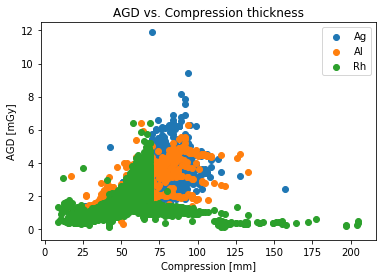

In [57]:
tmpdf =df_radMG[df_radMG["View"]=="cranio-caudal"] 

f,ax = plt.subplots()

for f in df_radMG["Filter"].unique():
    
    X = tmpdf[tmpdf["Filter"]==f]["Thickness"]
    Y = tmpdf[tmpdf["Filter"]==f]["AGD"]

    ax.scatter(x=X,y=Y,label=f)
    plt.legend()
plt.title("AGD vs. Compression thickness")
plt.xlabel("Compression [mm]")
plt.ylabel("AGD [mGy]")

It should be noted that the orange filter "Al" specifically corresponds to a different imaging technique with the same modality.

Open questions:
<li> Can we detect <b> trends </b> in patient dose for specific protocols for each scanner taking into account confounding factors such as weight/height/age/sex etc.? 
<li> Can we detect <b> outliers </b> in patient dose for specific protocols for each scanner taking into account confounding factors such as weight/height/age/sex etc.?

# Bucky data

In [62]:
df_radDX.head()

,Institution,Manufacturer,Model name,Station name,Display name,Accession number,Operator,Study date,Study time,Age,...,E10 Target exposure index,E10 Deviation index,E10 Relative x-ray exposure,E10 DAP (cGy.cm^2),E10 Entrance Exposure at RP (mGy),E10 SDD Detector Dist,E10 SPD Patient Dist,E10 SIsoD Isocentre Dist,E10 Table Height,E10 Comment
0,Dordwijk,FUJIFILM Corporation,NaN,FCLD4,Dordwijk FCLD4,0253300590,0253300590,2018-12-31,21:06:22,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dordwijk,FUJIFILM Corporation,NaN,FCPD1,Dordwijk FCPD1,0253300587,0253300587,2018-12-31,20:43:10,56.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albert Schweitzer Ziekenhuis,SIEMENS,Fluorospot Compact FD,YSIO_D1,Albert Schweitzer Ziekenhuis YSIO_D1,0253300586,NaN,2018-12-31,19:58:17,86.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albert Schweitzer Ziekenhuis,SIEMENS,Fluorospot Compact FD,YSIO_D1,Albert Schweitzer Ziekenhuis YSIO_D1,0253300580,NaN,2018-12-31,19:37:13,84.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albert Schweitzer Ziekenhuis,SIEMENS,Fluorospot Compact FD,YSIO_D1,Albert Schweitzer Ziekenhuis YSIO_D1,0253300579,NaN,2018-12-31,19:36:46,84.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Quality control data

In [2]:
import pickle
with open('wadqcresults.pickle', 'rb') as handle:
    wadqcres = pickle.load(handle)

In [4]:
for k in wadqcres.keys():
    print(k)

CT_Brilliance40_ZW_Catphan_503
MG_CDMAM_CDCOM_DIM2
CT_Biograph_DW_Catphan_503_Head_120kv_2.0_H21s
CT_Brilliance64_DW_Catphan_503
CT_Intevo_Catphan_503
CR_Normi13_Carestream
CT_Drive_DW_Catphan_503_120kv_spi_hf38
CT_Drive_DW_Catphan_503_120kv_spi_hr40
MG_Dimensions2_ArtifactEvaluation_RH
CT_Biograph_DW_Catphan_503
CT_GoTop_ZW_Catphan_503
CT_Flash_DW_Catphan_503
CT_Biograph_DW_Catphan_503_Seq_120kv_2.0_B45f
MG_Dimensions1_ArtifactEvaluation_RH
CR_BuckyFlatfield_DW2
MG_Dimensions1_ArtifactEvaluation_AG
MG_CDMAM_CDCOM_DIM1
CT_GoTop_ZW_Catphan_503_Gerline
CT_Drive_DW_Catphan_503
MG_Dimensions2_ArtifactEvaluation_AG
CT_Flash_DW_Catphan_503_120kv_spi_j70h
clone_0 of CR_Normi13_Carestream
CR_BuckyFlatfield_DW1


In [5]:
CT_Biograph = wadqcres['CT_Biograph_DW_Catphan_503']

In [6]:
len(CT_Biograph)

220

In [10]:
CT_Biograph[0]

[{'display_name': 'DateTime',
  'id': 5016,
  'limit': 14,
  'name': 'AcquisitionDateTime',
  'status': 3,
  'type': 'datetime',
  'units': '',
  'value': 'Wed, 06 Mar 2019 16:14:40 GMT'},
 {'display_name': '',
  'id': 74386,
  'limit': None,
  'name': 'Slice Thickness (mm)',
  'status': 0,
  'type': 'float',
  'units': '',
  'value': 1.934091796875},
 {'display_name': '',
  'id': 74385,
  'limit': None,
  'name': 'Geometric Line Average (mm)',
  'status': 0,
  'type': 'float',
  'units': '',
  'value': 50.0407855201538},
 {'display_name': '',
  'id': 74384,
  'limit': None,
  'name': 'MTF 50 (lp/mm)',
  'status': 0,
  'type': 'float',
  'units': '',
  'value': 0.64},
 {'display_name': '',
  'id': 74383,
  'limit': None,
  'name': 'Low contrast visibility',
  'status': 0,
  'type': 'float',
  'units': '',
  'value': 7.7038603889819},
 {'display_name': '',
  'id': 74382,
  'limit': None,
  'name': 'Integral non-uniformity',
  'status': 0,
  'type': 'float',
  'units': '',
  'value': 0.0

In [15]:
x = []
y = []

for r in CT_Biograph:
    tmpx = [x for x in r if x['name'] == 'AcquisitionDateTime'][0]
    tmpy = [y for y in r if y['name'] == 'HU_LDPE'][0]
   
    x.append(tmpx['value'])
    y.append(tmpy['value'])

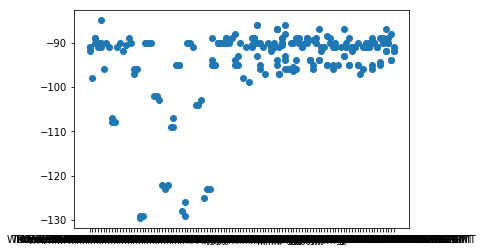

In [17]:
plt.scatter(x=x,y=y)